# Zuber

## Pendahuluan

### Melakukan analisis mengenai perusahan bernama Zuber, dimana merupakan perusahaan barbagi tumpangan. Biasa di sebut ride sharing, untuk melihat faktor faktor seperti pengaruh banyaknya perjalanan yang di lakukan dan pengaruh cuaca terhadap banyaknya perjalanan yang di lakukan sekaligus melakukan perbandingan terhadap kompetitor

## Rincian Penelitian
### Data berdasarkan perjalanan dari setiap perusahaan berbagi tumpangan yang sama di chicago pada tahun 2017 bulan November


## Analisis Eksplorasi

### Melakukan import dataset

In [2]:
#library
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from scipy import stats as st

### Data yang di perlukan

In [3]:
df1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df2 = pd.read_csv('/datasets/project_sql_result_04.csv')
df3 = pd.read_csv ('/datasets/project_sql_result_07.csv')

### Melihat sample data

Mengeksplorasi Data Awal
Kita memiliki dua dataframe berikut:

df_1 - memuat data berikut ini:

company_name : nama perusahaan taksi
trips_amount : jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.
df_2 - memuat data berikut ini:

dropoff_location_name : nama wilayah di Chicago tempat perjalanan berakhir
average_trips : jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.
df_3 - memuat data perjalanan dari Loop ke Bandara Internasional O'Hare dengan isi kolom-kolom berikut ini:

start_ts : tanggal dan waktu penjemputan
weather_conditions : kondisi cuaca saat perjalanan dimulai
duration_seconds : durasi perjalanan dalam satuan detik

In [4]:
# Memperlihatkan dataset secara umum tentang ketiga DataFrame

number = 1
for dataset in df1, df2, df3:
    print(f'\ndata sample for df_{number}')
    print(dataset.head())
    number += 1


data sample for df_1
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

data sample for df_2
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

data sample for df_3
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


### Melakukan pengecekan informasi data pada dataset

In [5]:
# Menampilkan informasi data umum tentang ketiga DataFrame


number = 1
for dataset in df1, df2, df3:
    print(f'\ndata sample for df_{number}')
    print(dataset.info())
    number += 1


data sample for df_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

data sample for df_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

data sample for df_3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null

1. Kesimpulan Awal
 1. Dilihat tidak ada data null dan data duplikat 
 2. Kemungkinan besar tidak ada nilai yang hilang
 3. Terdapat tipe data yang perlu di perbaiki karena tidak sesuai pada kolom 'start_ts'. Perlu di ganti menjadi datetime
 4. Pada kolom 'average_trips'perlu di lakukan perbaikan menjadi bilangan bulat atau integer karena merujuk pada data total nilai perjalanan

## Melakukan Perbaikan Data

### Melakukan perbaikan data pada kolom  'start_ts'

In [6]:
df3['start_ts']= pd.to_datetime(df3['start_ts'])

In [7]:
# Melakukan pengecekan terhadap dataset df3

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


### Perbaikan untuk mengubah tipe data pada kolom 'start_ts' sudah di lakukan untuk mempermudah proses analysis

## Selanjutnya melakukan identifikasi 10 wilayah utama yang menjadi titik penjemputan Zuber

In [8]:
chsen_loc = df2.head(10)
chsen_loc

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


1. Kesimpulan awal
 1. Dengan menggunakan metode head untuk memperlihatkan lokasi penjemputan yang paling banyak
 2. Jumlah yang di dapatkan merupakan rata rata dari jumlah perjalanan yang di terima pada tahun 2017
 3. Pada dataset df2 sudah merupakan data yang sudah di sorted dari jumlah penjemputan paling banyak ke paling sedikit 

## Membuat grafik untuk melanjutkan proses analysis

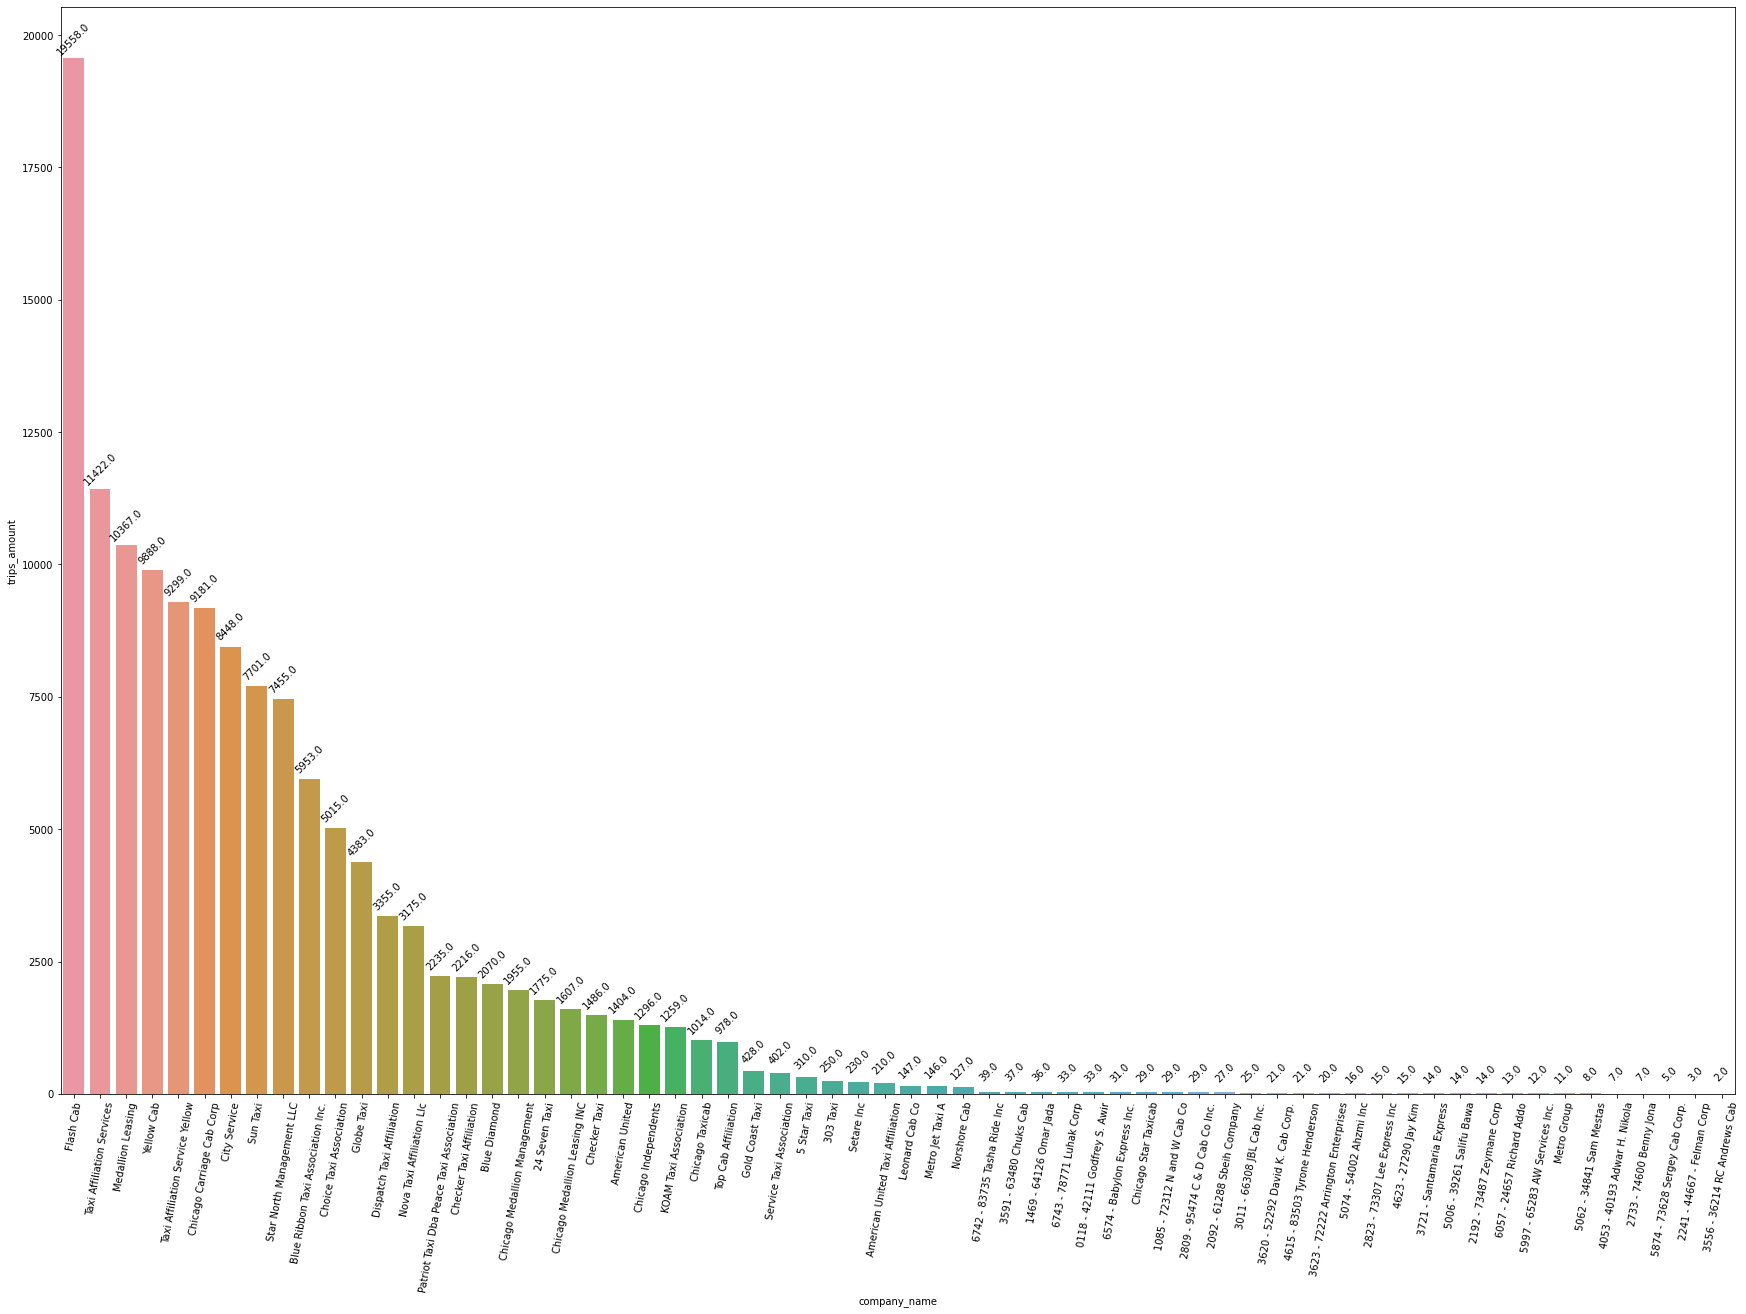

In [20]:
#perusahaan ride hailing dan jumlah perjalanannya
plt.figure(figsize=(30,20))
adplot = sns.barplot(data=df1, x='company_name', y='trips_amount')

for g in adplot.patches:
    adplot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')
plt.xticks(rotation = 80)
plt.show()

In [9]:
df1.head(20)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


### Dapat di simpulkan Flash cab mempunyai jumlah perjalanan paling banyak dengan 19558 kali penjemputan penumpang

### Membuat grafik berdasarkan 10 wilayah teratas dengan jumlah perjalanan paling banyak

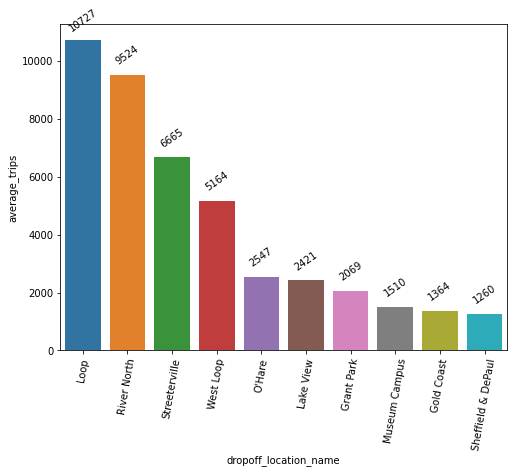

In [19]:
plt.figure(figsize=(8,6))
splot= sns.barplot(data=chsen_loc, x='dropoff_location_name', y='average_trips')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x()+ g.get_width()/ 2., g.get_height()),
                   ha= 'center', va= 'center',
                   xytext= (0, 20),rotation= 35,
                   textcoords= 'offset points')

plt.xticks(rotation= 80)
plt.show()

### Kesimpulan yang bisa di ambil adalah wilayah Loop mungkin tempat dengan tingkat kesibukan transit yang tinggi, biasanya business district. disusul dengan River North dengan selisih yang tidak terlalu banyak 

## Uji Hipotesis

In [21]:
df3.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


### membuat kolom baru untuk menunjukan hari dalam hitungan satu minggu

In [23]:
df3['day']= df3['start_ts'].dt.dayofweek
df3.head()

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5


In [24]:
df3.sample(7)

,start_ts,weather_conditions,duration_seconds,day
2,2017-11-25 12:00:00,Good,1543.0,5
997,2017-11-11 12:00:00,Good,1990.0,5
877,2017-11-18 06:00:00,Good,1520.0,5
810,2017-11-04 17:00:00,Bad,2580.0,5
88,2017-11-04 04:00:00,Good,1333.0,5
710,2017-11-18 14:00:00,Good,3540.0,5
10,2017-11-18 06:00:00,Good,1500.0,5


<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Membuat tabel untuk menunjukan cuaca yang baik

In [13]:
gwea= df3.loc[df3['weather_conditions']== 'Good']
gwea.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [14]:
gwea.describe()

,duration_seconds
count,888.000000
mean,1999.675676
std,759.198268
min,0.000000
25%,1389.750000
50%,1800.000000
75%,2460.000000
max,7440.000000


In [15]:
# pengecekan nilai varian pada cuaca yang baik
gwea.var()

duration_seconds    576382.00969
dtype: float64

### Membuat tabel untuk menunjukan cuaca buruk dalam penerimaan perjalanan

In [16]:
bad= df3.loc[df3['weather_conditions']== 'Bad']
bad.head()

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0


In [17]:
# melakukan pengecekan nilai varian pada tabel bad

bad.var()

duration_seconds    520294.086002
dtype: float64

In [18]:
bad.describe()

,duration_seconds
count,180.000000
mean,2427.205556
std,721.314138
min,480.000000
25%,1962.000000
50%,2540.000000
75%,2928.000000
max,4980.000000


In [24]:
# Menambahkan kolom dari start_ts untuk membaginya dalam. hitungan bulan dan hari untuk melakukan analysis data yang tersebar pada bulan tersebut

df3['months'] = df3['start_ts'].dt.month
df3['days'] = df3['start_ts'].dt.day
df3

,start_ts,weather_conditions,duration_seconds,months,days
0,2017-11-25 16:00:00,Good,2410.0,11,25
1,2017-11-25 14:00:00,Good,1920.0,11,25
2,2017-11-25 12:00:00,Good,1543.0,11,25
3,2017-11-04 10:00:00,Good,2512.0,11,4
4,2017-11-11 07:00:00,Good,1440.0,11,11
...,...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,11,25
1064,2017-11-11 10:00:00,Good,1318.0,11,11
1065,2017-11-11 13:00:00,Good,2100.0,11,11
1066,2017-11-11 08:00:00,Good,1380.0,11,11


In [25]:
# Menambah kolom untuk pembuatan barplot, dimana perlu menyesuaikan tipe data terlebih dahulu

df3['month_day'] = df3['months'].astype('str') + '_' + df3['days'].astype('str')
df3

,start_ts,weather_conditions,duration_seconds,months,days,month_day
0,2017-11-25 16:00:00,Good,2410.0,11,25,11_25
1,2017-11-25 14:00:00,Good,1920.0,11,25,11_25
2,2017-11-25 12:00:00,Good,1543.0,11,25,11_25
3,2017-11-04 10:00:00,Good,2512.0,11,4,11_4
4,2017-11-11 07:00:00,Good,1440.0,11,11,11_11
...,...,...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,11,25,11_25
1064,2017-11-11 10:00:00,Good,1318.0,11,11,11_11
1065,2017-11-11 13:00:00,Good,2100.0,11,11,11_11
1066,2017-11-11 08:00:00,Good,1380.0,11,11,11_11


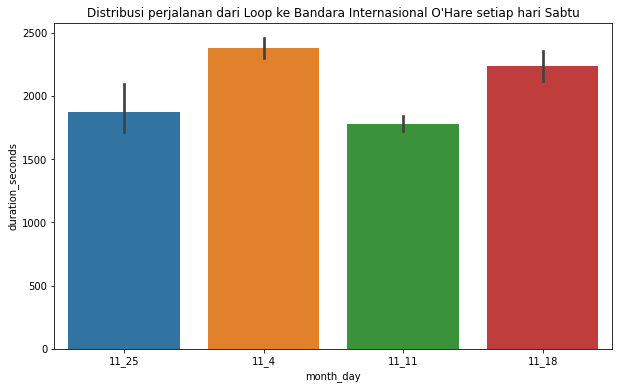

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(data=df3, x='month_day', y='duration_seconds')
plt.title("Distribusi perjalanan dari Loop ke Bandara Internasional O'Hare setiap hari Sabtu")
plt.show();

*Tedapat 2 tabel berguna untuk melakukan pengujian hipotesis pengaruh cuaca pada banyaknya perjalanan*

# Membuat hipotesis 

**dari 2 tabel cuaca diatas, bisa digunakan untuk melakukan uji hipotesis tentang pengaruh cuaca terhadap durasi rata-rata perjalanan, dengan rumusan hipotesis sebagai berikut:**

H0:Durasi rata-rata perjalanan di hari sabtu dari Loop ke Bandara Internasional O'Hare saat hujan **sama** dengan durasi rata-rata perjalanan saat cuaca baik

H1:Durasi rata-rata perjalanan di hari sabtu dari Loop ke Bandara Internasional O'Hare saat hujan **berbeda** dengan durasi rata-rata perjalanan saat cuaca baik.

In [19]:
# menentukan signifikansi dan p value

alpha= 0.05
results= st.ttest_ind(gwea['duration_seconds'], bad['duration_seconds'], equal_var=False)
results.pvalue

6.738994326108734e-12

In [20]:
# Melihat hasil hipotesis

if (results.pvalue< alpha):
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak dapat menolak hipotesis nol')

Kita menolak hipotesis nol


**Hasil hipotesis dapat di simpulkan cuaca hujan mempengaruhi durasi perjalanan, Penolakan H0 mempunyai arti durasi rata rata perjalanan dari Loop menuju bandara International O'Hare berubah pada hari sabtu yang hujan

### Kesimpulan 

1.Kualitas datanya cukup bagus, dimana tipe data yang sudah sesuai, penamaan kolom yang sudah tepat, tidak ada nilai-nilai yang hilang, namun ada ada data duplikat di df_3 yang telah diperbaiki.

2.Kemudian, pada tabel df_2, kolom average_trips merupakan rata-rata perjalanan setiap penumpang, maka tipe floating tersebut telah kita ubah menjadi integer dengan menghapus akhiran koma, agar lebih tepat dengan makna kolom tersebut.

3. Perusahaan taksi yang paling terkenal dengan jumlah perjalanan diatas 10ribu kali selama bulan November 2017, diantaranya adalah Flash Cab, Taxi Affiliation Services, dan Medallion Leasing.

4. Hasil uji hipotesis menunjukkan bahwa kita menolak hipotesis nol, yang berarti durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare tidak sama pada hari-hari Sabtu yang hujan.

### Input

1. Kita perlu banyak menggali apa saja kelebihan para kompetitor yang menarik hati banyak penumpang, untuk dapat bersaing dengan mereka di Chicago. Ketiga perusahaan taksi terkenal Flash Cab, Taxi Affiliation Services, dan Medallion Leasing, dapat dijadikan tolak ukur.

2. Fokuslah ke wilayah Loop, karena merupakan Top 1 wilayah titik antar yang paling diminati penumpang. Namun, bersiap-siaplah dengan kompetitor yang tinggi pula.

3. Apabila ingin tantangan baru di wilayah baru, bisa dimulai dari yang Top 10 yaitu Sheffield & DePaul. Periklanan dan sosialisasi harus ditingkatkan karena mungkin saja rendahnya titik antar kesana dikarenakan penduduk wilayah tersebut belum mengetahui mengenai metode perjalanan dengan ride-sharing.